## UCI Healthcare-Workforce-Mental-Health-Dataset-Exploratory and Descriptive analysis

this notebook if focused on data preparation, cleaning and preprocessing for the 
UCI Healthcare-Workforce-Mental-Health-Dataset
This project aims to perform a comprehensive exploratory and descriptive analysis of the Healthcare Workforce Mental Health Dataset from UCI. The dataset focuses on the mental health conditions, treatment, employer support, and workplace impact for employees in the healthcare sector.

we start for include all library that are neede to make our project work

In [6]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import textwrap 

## Define and Create Paths
This project follows a structured path starting with the definition of the problem—understanding mental health trends, treatment, and workplace support among healthcare professionals using the UCI Healthcare Workforce Mental Health Dataset. After acquiring and loading the dataset, we performed thorough data cleaning, handling missing values and standardizing categories for consistent analysis. We then conducted exploratory data analysis, Grouping and aggregation methods were used to compare mental health outcomes across regions and company sizes. Visualizations were created to clearly communicate trends, and descriptive statistics were calculated to summarize the dataset. The project concluded with key insights highlighting gaps in support and variations in treatment openness across demographics—laying the groundwork for data-driven mental health policies in healthcare workplaces.

In [7]:
# Get working directory
current_dir = os.getcwd()

# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)

# Define paths to the data folder
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')        
processed_dir = os.path.join(data_dir, 'processed')

# Define paths to results folder
results_dir = os.path.join(project_root_dir, 'results')

# Define paths to docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# Create directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Read in the data
we load the "Healthcare Workforce Mental Health Dataset.csv"

In [8]:
mental_health_df = os.path.join(processed_dir, "Healthcare Workforce Mental Health Dataset.csv")
mental_health_df = pd.read_csv(mental_health_df)
mental_health_df.head(10)

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No
5,HCP-00006,Registered Nurse,General Medicine,Heavy Workload,9,Occasionally,2,Yes,11,Yes
6,HCP-00007,Registered Nurse,General Medicine,Poor Work Environment,6,Occasionally,4,Yes,3,Yes
7,HCP-00008,Radiology Technician,Radiology,Career Stagnation,5,Occasionally,2,Yes,7,No
8,HCP-00009,Medical Assistant,Outpatient Services,Poor Work Environment,8,Often,2,Yes,9,Yes
9,HCP-00010,Nursing Assistant,Assisted Living,Heavy Workload,9,Occasionally,1,Yes,8,No


This visualization analyzes the average stress level across departments by grouping the data and calculating the mean stress level for each. A horizontal bar chart, styled with a professional dark theme, displays departments sorted from highest to lowest stress.  This provides a clear view of which departments experience higher stress, helping guide targeted mental health interventions.

In [ ]:
!pip install -U kaleido
# Group by Department and calculate the average Stress Level
avg_stress_by_dept = (
    mental_health_df
    .groupby('Department', as_index=False)['Stress Level']
    .mean()
)

# Sort the departments by Stress Level, descending
avg_stress_by_dept = avg_stress_by_dept.sort_values(by='Stress Level', ascending=False)

# Create the horizontal bar chart with data labels
fig = px.bar(
    avg_stress_by_dept,
    x='Stress Level',
    y='Department',
    orientation='h',
    title='Average Stress Level by Department',
    labels={'Stress Level': 'Stress Level', 'Department': 'Department'},
    color_discrete_sequence=['#00ffff'],
    text='Stress Level'
)
#Format text and axes so labels don’t overlap
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside',
    cliponaxis=False
)
fig.update_xaxes(automargin=True)

# Unified layout & styling
fig.update_layout(
    template='presentation',
    xaxis_title='Stress Level',
    yaxis_title='Department',
    xaxis_range=[0, 9],
    width=1000,
    height=500,
    margin=dict(l=220, r=60, t=60, b=120),
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    font=dict(color='white'),
    legend_title=dict(text='Income Level')
)

# Render & export
fig.show()
os.makedirs(results_dir, exist_ok=True)
fig.write_image(os.path.join(results_dir, 'Average_stress_level_by_Department.jpg'))
fig.write_image(os.path.join(results_dir, 'Average_stress_level_by_Department.png'))
fig.write_html(os.path.join(results_dir, 'Average_stress_level_by_Department.html'))

## Visualization: Mental Health Absences by Access to EAPs
This step explores the relationship between access to Employee Assistance Programs (EAPs) and the average number of mental health absences reported by employees. Using the processed dataset, we first grouped the data by EAP access status and calculated the mean number of mental health absences for each group. A bar chart was then created using Plotly Express to visualize this comparison. The chart features clearly labeled bars with numeric values displayed on top for better readability. A dark-themed presentation layout was applied for visual consistency, and axes were formatted for clarity. The final chart reveals how the availability of EAPs may influence the frequency of mental health-related absences, offering valuable insights for organizational mental health support strategies.

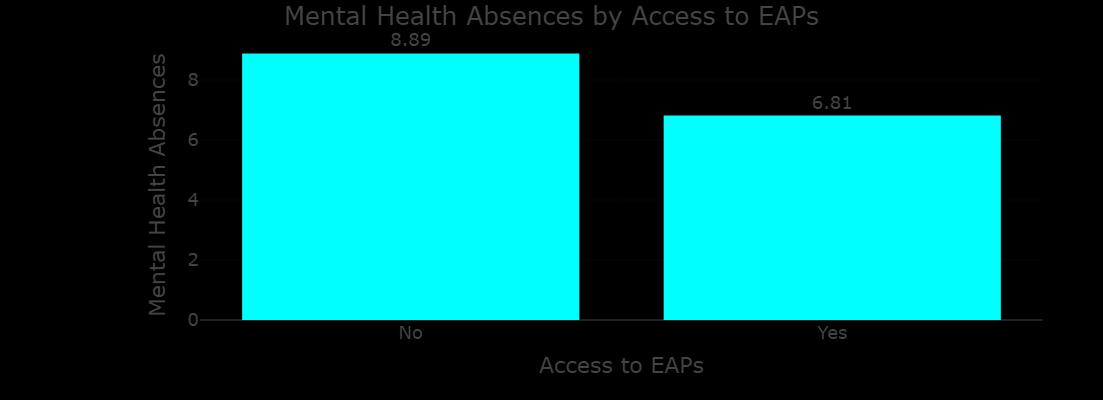

In [35]:
import plotly.express as px
import pandas as pd
import os

# Load the dataset
file_path = os.path.join(processed_dir, "Healthcare Workforce Mental Health Dataset.csv")
mental_health_df = pd.read_csv(file_path)

# Group by access to EAPs and calculate average mental health absence
avg_absence_by_eap = mental_health_df.groupby('Access to EAPs')['Mental Health Absences'].mean().reset_index()

# Plot bar chart
fig = px.bar(
    avg_absence_by_eap,
    x='Access to EAPs',
    y='Mental Health Absences',
    title='Mental Health Absences by Access to EAPs',
    labels={'Access to EAPs': 'Access to EAPs', 'Mental Health Absences': 'Mental Health Absences'},
    color_discrete_sequence=['#00ffff'],
    text='Mental Health Absences'
)

# Format labels and layout
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside', 
    cliponaxis=False
)
fig.update_layout(
    template='presentation',                       
    legend_title=dict(text='Income Level'),       
    xaxis_title='Access to EAPs',                  
    yaxis_title='Mental Health Absences',          
    yaxis_range=[0, 9],                           
    width=600,                                    
    height=400,                                     
    margin=dict(
        l=200,                                      
        r=60,                                     
        t=50,                                     
        b=80                                  
    ),                                            
    paper_bgcolor='rgb(0, 0, 0)',                  
    plot_bgcolor='rgb(0, 0, 0)'                 
)

fig.show()


## visualization: Job Satisfaction by Employee Type
This analysis examines how job satisfaction varies across different employee types within the healthcare workforce. After reading the dataset from the processed directory, the data was grouped by the Employee Type column, and the mean job satisfaction score was calculated for each group. A bar chart was then created using Plotly Express to visualize these averages. The chart clearly displays employee types along the x-axis and their corresponding average satisfaction levels on the y-axis. Numeric labels are shown above each bar for easy interpretation, and a dark-themed layout enhances visual appeal. The chart was formatted with a horizontal margin and tilted x-axis labels to avoid overlap. This visualization helps highlight which employee categories report higher or lower levels of satisfaction, offering useful insights for workforce well-being and HR planning. The results were prepared for export to multiple formats, supporting reporting and presentation use.

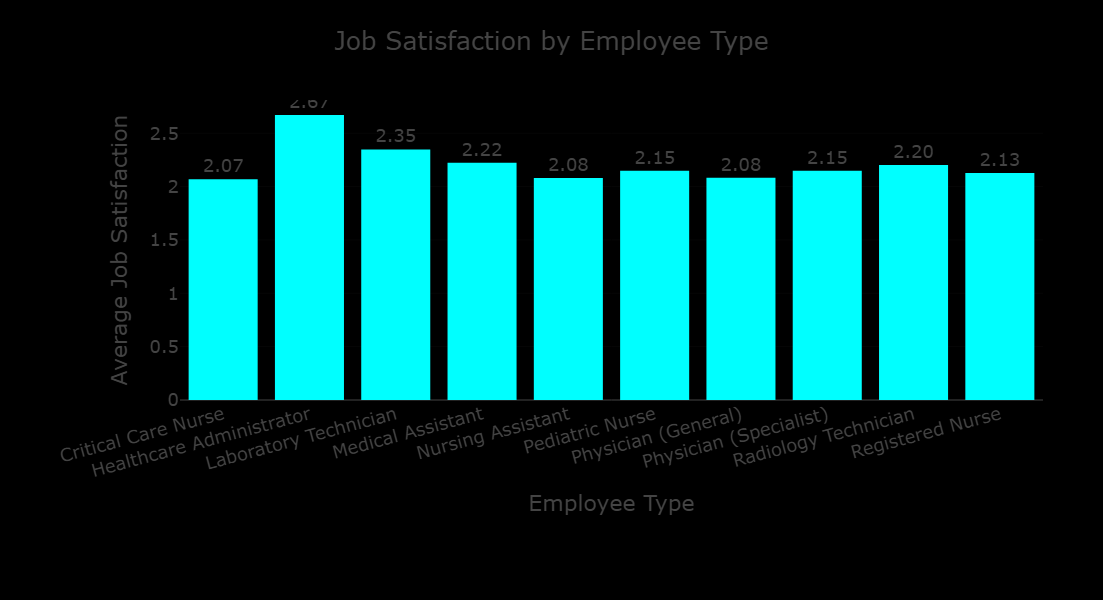

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [27]:
import os
# Define the path to the dataset
file_path = os.path.join(processed_dir, "Healthcare Workforce Mental Health Dataset.csv")

# Read the dataset
mental_health_df = pd.read_csv(file_path)

# Group by 'Employee Type' and calculate average 'Job Satisfaction'
avg_satisfaction_by_type = mental_health_df.groupby('Employee Type')['Job Satisfaction'].mean().reset_index()

# Create the bar chart
fig = px.bar(
    avg_satisfaction_by_type,
    x='Employee Type',
    y='Job Satisfaction',
    title='Job Satisfaction by Employee Type',
    labels={
        'Job Satisfaction': 'Average Job Satisfaction',
        'Employee Type': 'Employee Type'
    },
    color_discrete_sequence=['#00ffff'],
    text='Job Satisfaction'
)

# Improve layout and appearance
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

fig.update_layout(
    template='presentation',
    legend_title=dict(text='Income Level'),
    xaxis_title='Employee Type',
    yaxis_title='Average Job Satisfaction',
    xaxis_tickangle=-15,
    
    width=1500,
    height=600,
    margin=dict(l=180, r=60, t=100, b=200),
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)'
)

fig.show()

# Write outputs
os.makedirs(results_dir, exist_ok=True)
fig.write_image(os.path.join(results_dir, 'Jobsatisfaction_by_employee Type.jpg,'))
fig.write_image(os.path.join(results_dir, 'Jobsatisfaction_by_employee Type.png'))
fig.write_html(os.path.join(results_dir, 'Jobsatisfaction_by_employee Type.html'))

### Here we tried to make correlation for stress level and job satisfaction here we found that for correlation we have spearman Rank Correlation
Measures: The strength and direction of a monotonic relationship (not necessarily linear).

Uses ranks: It converts values into ranks before correlating.

Range: Also from -1 to +1

Use when:

Data is not normally distributed

You suspect a nonlinear but monotonic relationship

Variables are ordinal (like "Job Satisfaction" rated 1–5)

In [11]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Dione\Downloads\healthcare\data\processed\Healthcare Workforce Mental Health Dataset.csv")


In [12]:
# Select only the relevant columns and drop missing values
data = df[['Stress Level', 'Job Satisfaction']].dropna()


In [13]:
from scipy.stats import spearmanr

# Spearman correlation (monotonic)
spearman_corr, spearman_p = spearmanr(data['Stress Level'], data['Job Satisfaction'])

print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")


Spearman Correlation: -0.37, p-value: 0.0000


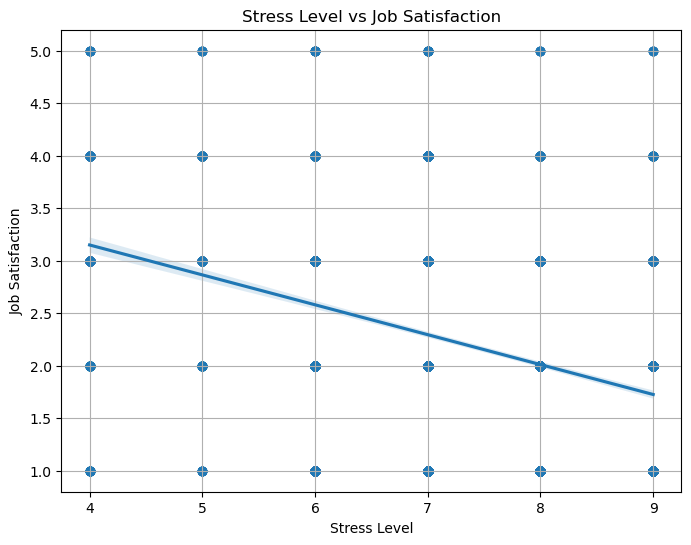

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x='Stress Level', y='Job Satisfaction', data=data, scatter_kws={'alpha':0.5})
plt.title("Stress Level vs Job Satisfaction")
plt.xlabel("Stress Level")
plt.ylabel("Job Satisfaction")
plt.grid(True)
plt.show()


## statistical test for departments and burnout frequency
This code tests whether burnout frequency is associated with the department healthcare workers belong to. It does this by:

Counting how many people in each department report various burnout levels.

Comparing these to what we would expect by chance.

If the difference is big enough (statistically), we say there is a relationship.

This section performs a Chi-Square test of independence to assess whether there is a statistically significant relationship between the Department a person works in and how often they report experiencing Burnout.




In [34]:

from scipy.stats import chi2_contingency

# Step 1: Clean the data (drop rows with missing values)
df_clean = df[['Department', 'Burnout Frequency']].dropna()

# Step 2: Create a contingency table
contingency = pd.crosstab(df_clean['Department'], df_clean['Burnout Frequency'])

# Step 3: Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Step 4: Output the results
print("Contingency Table:")
print(contingency)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))
print(f"\nChi-square test result: χ² = {chi2:.2f}, p = {p:.4f}, dof = {dof}")

# Step 5: Interpretation
if p < 0.05:
    print("There is a statistically significant association between Department and Burnout Frequency.")
else:
    print(" There is no statistically significant association between Department and Burnout Frequency.")



Contingency Table:
Burnout Frequency    Never  Occasionally  Often
Department                                     
Administration         149           244    114
Assisted Living         65           209    228
General Medicine       203           470    610
General Practice        56           135    181
ICU                     73           165    250
Laboratory              58           145    151
Outpatient Services     80           202    231
Pediatrics              43            97    122
Radiology               67           133    176
Specialty Care          44           141    158

Expected Frequencies:
Burnout Frequency       Never  Occasionally     Often
Department                                           
Administration        84.9732      196.8174  225.2094
Assisted Living       84.1352      194.8764  222.9884
General Medicine     215.0308      498.0606  569.9086
General Practice      62.3472      144.4104  165.2424
ICU                   81.7888      189.4416  216.7696
Labo